# Task : Prediction using Unsupervised ML

From the given `Iris` dataset, predict the optimum number of clusters
and represent it visually.

## imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
94,5.6,2.7,4.2,1.3
147,6.5,3.0,5.2,2.0
97,6.2,2.9,4.3,1.3
144,6.7,3.3,5.7,2.5
27,5.2,3.5,1.5,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Find optimul number of clusters using `Elbow method`

In [11]:
# Elbow Method
x = iris.data
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i ,random_state=0 )
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

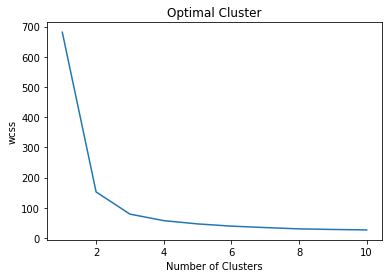

In [12]:
# Plot
plt.plot(range(1,11) , wcss)
plt.title('Optimal Cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

**As we  can see after the 3 cluster the result will be almost deminising .So we can use model with 3 clusters**

In [13]:
kmeans = KMeans(n_clusters=3 , random_state=0)

pred = kmeans.fit_predict(x)

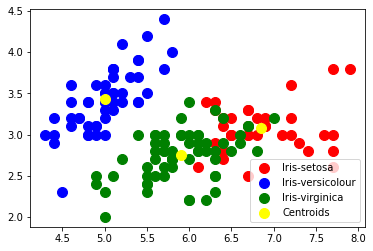

In [15]:
# Let's plot the outcomes
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


**Thankyou**